In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

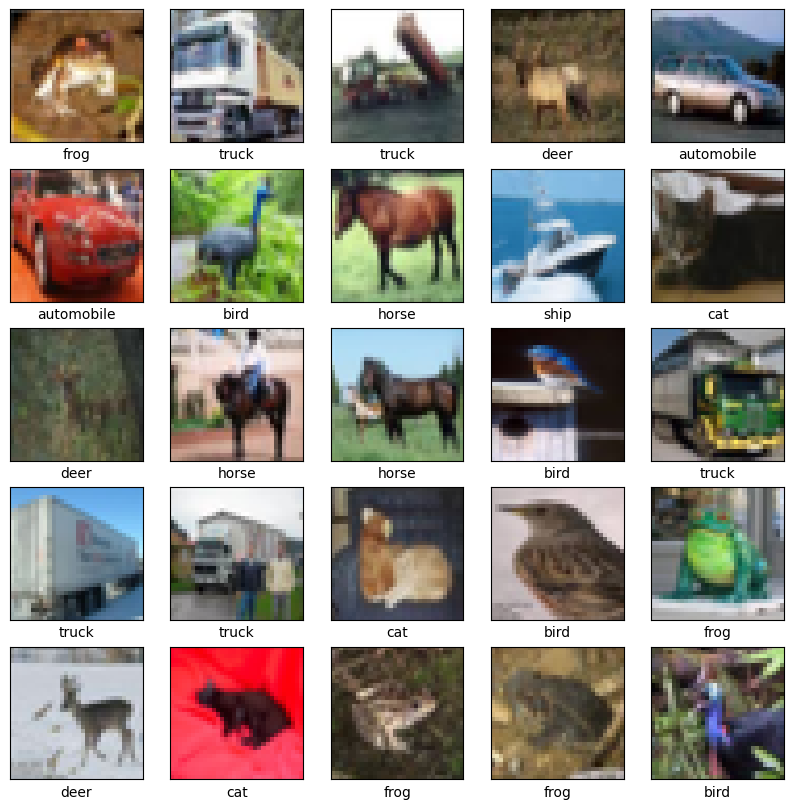

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Experiment 1

---

In [4]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(32))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
 dense (Dense)               (None, 128)               921728    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
Total params: 926752 (3.54 MB)
Trainable params: 926752 (3.54 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [6]:
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [7]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 27s 16ms/step - loss: 1.4477 - accuracy: 0.4864 - val_loss: 1.2471 - val_accuracy: 0.5651
Epoch 2/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.1563 - accuracy: 0.5937 - val_loss: 1.1554 - val_accuracy: 0.5989
Epoch 3/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.0288 - accuracy: 0.6406 - val_loss: 1.0977 - val_accuracy: 0.6140
Epoch 4/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.9253 - accuracy: 0.6762 - val_loss: 1.0940 - val_accuracy: 0.6245
Epoch 5/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8401 - accuracy: 0.7084 - val_loss: 1.0319 - val_accuracy: 0.6505
Epoch 6/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.7662 - accuracy: 0.7326 - val_loss: 1.0670 - val_accuracy: 0.6534
Epoch 7/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.6968 - accuracy: 0.7559 - val_loss: 1.0738 -

313/313 - 1s - loss: 1.1904 - accuracy: 0.6403 - 1s/epoch - 4ms/step


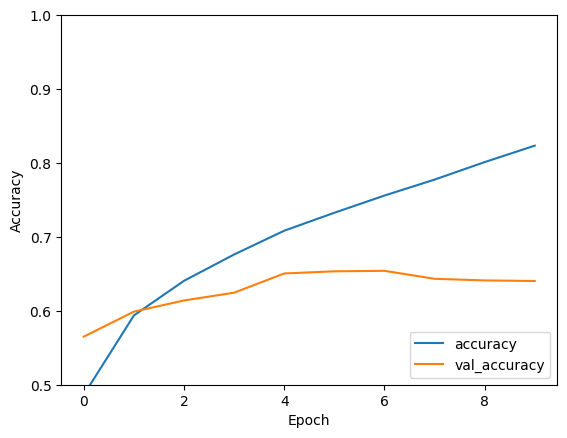

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

## Experiment 2

---

In [93]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

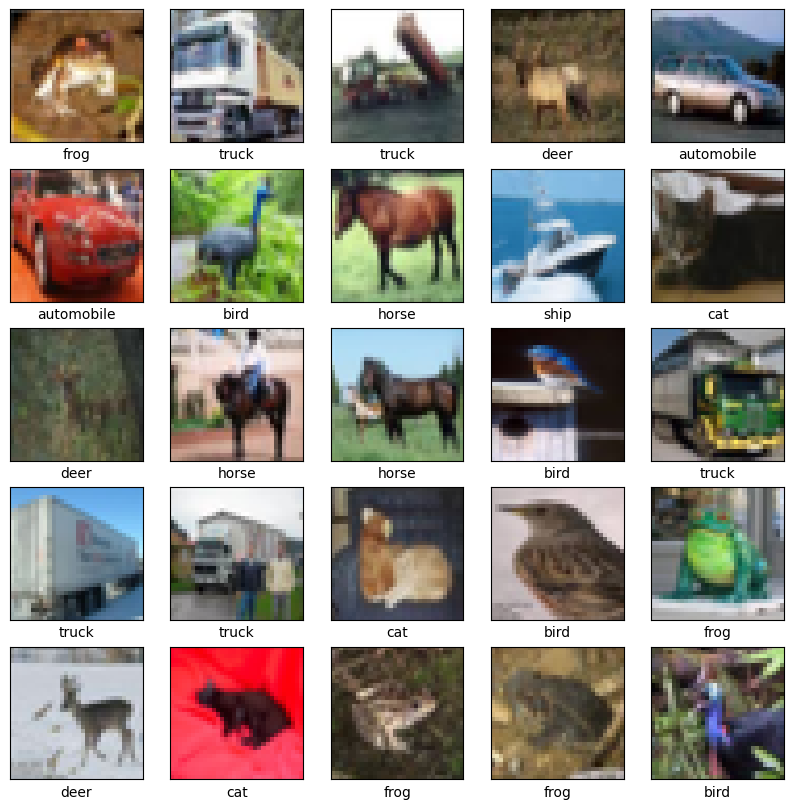

In [94]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [100]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dropout(rate=0.01))

In [101]:
model.compile(optimizer="adam", loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [102]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 26s 15ms/step - loss: 1.4841 - accuracy: 0.4768 - val_loss: 1.2373 - val_accuracy: 0.5616
Epoch 2/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.1928 - accuracy: 0.5837 - val_loss: 1.1390 - val_accuracy: 0.5960
Epoch 3/10
1563/1563 [==============================] - 24s 16ms/step - loss: 1.0670 - accuracy: 0.6274 - val_loss: 1.0987 - val_accuracy: 0.6107
Epoch 4/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.9634 - accuracy: 0.6637 - val_loss: 1.0835 - val_accuracy: 0.6325
Epoch 5/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8751 - accuracy: 0.6964 - val_loss: 1.0665 - val_accuracy: 0.6267
Epoch 6/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7989 - accuracy: 0.7246 - val_loss: 1.0232 - val_accuracy: 0.6526
Epoch 7/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.7261 - accuracy: 0.7483 - val_loss: 1.0385 -

313/313 - 1s - loss: 1.1891 - accuracy: 0.6420 - 833ms/epoch - 3ms/step


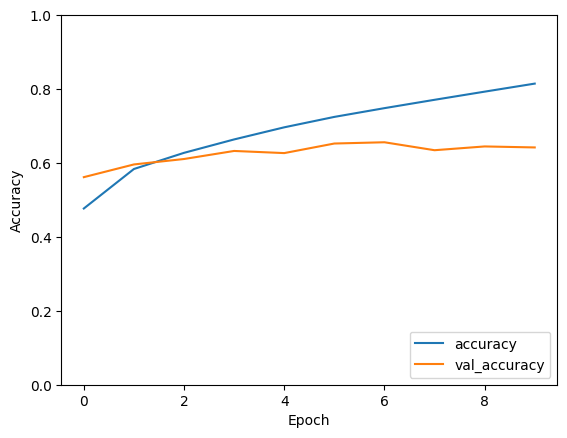

In [103]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

## Experiment 3

---

In [58]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

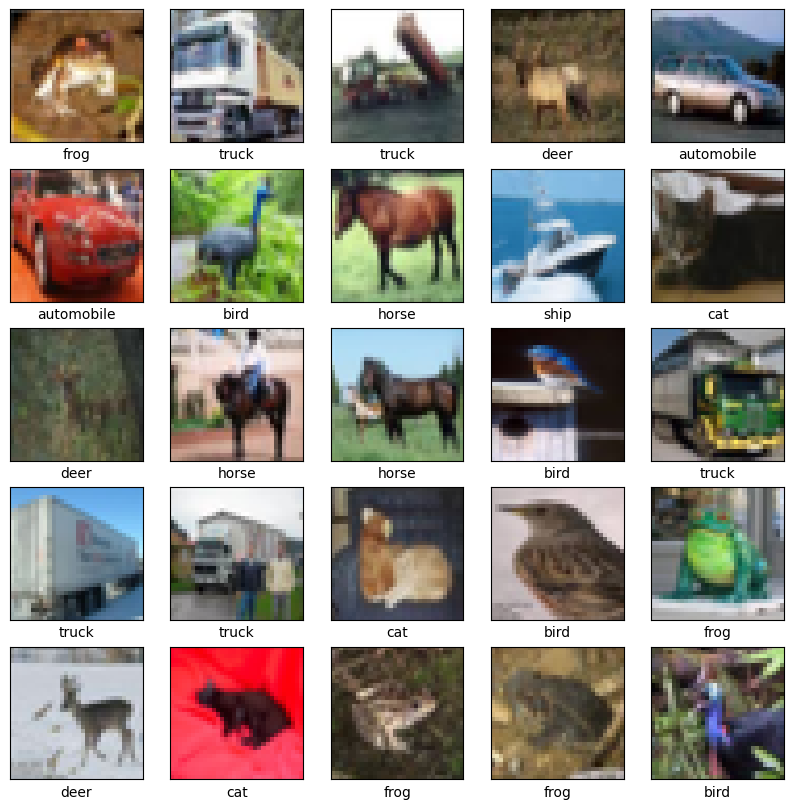

In [59]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [81]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(32))

In [82]:
optimize = keras.optimizers.Adam(learning_rate=0.0005)

In [83]:
model.compile(optimizer=optimize, loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [84]:
history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 29s 18ms/step - loss: 1.5318 - accuracy: 0.4566 - val_loss: 1.3490 - val_accuracy: 0.5231
Epoch 2/20
1563/1563 [==============================] - 21s 13ms/step - loss: 1.2441 - accuracy: 0.5632 - val_loss: 1.2096 - val_accuracy: 0.5723
Epoch 3/20
1563/1563 [==============================] - 21s 13ms/step - loss: 1.1317 - accuracy: 0.6036 - val_loss: 1.1322 - val_accuracy: 0.6034
Epoch 4/20
1563/1563 [==============================] - 21s 13ms/step - loss: 1.0446 - accuracy: 0.6359 - val_loss: 1.1170 - val_accuracy: 0.6088
Epoch 5/20
1563/1563 [==============================] - 21s 13ms/step - loss: 0.9707 - accuracy: 0.6628 - val_loss: 1.0917 - val_accuracy: 0.6158
Epoch 6/20
1563/1563 [==============================] - 21s 13ms/step - loss: 0.9017 - accuracy: 0.6869 - val_loss: 1.0254 - val_accuracy: 0.6408
Epoch 7/20
1563/1563 [==============================] - 21s 14ms/step - loss: 0.8469 - accuracy: 0.7061 - val_loss: 1.0478 -

313/313 - 1s - loss: 1.2645 - accuracy: 0.6487 - 797ms/epoch - 3ms/step


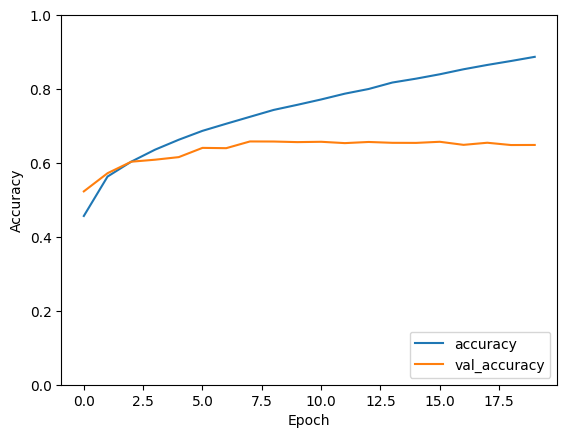

In [85]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

## Optional pass

---

In [117]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

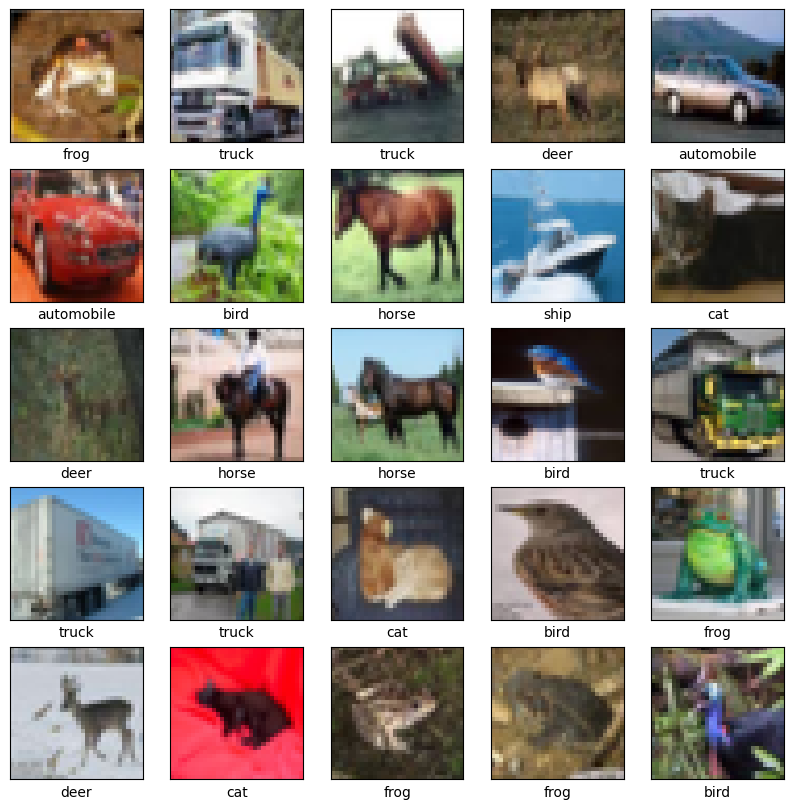

In [118]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [124]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dropout(rate=0.01))
model.add(keras.layers.BatchNormalization())

In [125]:
optimize = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimize, loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [126]:
history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 26s 16ms/step - loss: 1.9505 - accuracy: 0.5059 - val_loss: 1.5060 - val_accuracy: 0.5509
Epoch 2/20
1563/1563 [==============================] - 24s 16ms/step - loss: 1.2880 - accuracy: 0.6122 - val_loss: 1.2923 - val_accuracy: 0.5761
Epoch 3/20
1563/1563 [==============================] - 25s 16ms/step - loss: 1.0755 - accuracy: 0.6539 - val_loss: 1.1088 - val_accuracy: 0.6312
Epoch 4/20
1563/1563 [==============================] - 25s 16ms/step - loss: 0.9462 - accuracy: 0.6868 - val_loss: 1.1408 - val_accuracy: 0.6215
Epoch 5/20
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8477 - accuracy: 0.7173 - val_loss: 1.0613 - val_accuracy: 0.6451
Epoch 6/20
1563/1563 [==============================] - 25s 16ms/step - loss: 0.7641 - accuracy: 0.7411 - val_loss: 1.0355 - val_accuracy: 0.6574
Epoch 7/20
1563/1563 [==============================] - 24s 16ms/step - loss: 0.6868 - accuracy: 0.7681 - val_loss: 1.1434 -

313/313 - 1s - loss: 1.5984 - accuracy: 0.6120 - 831ms/epoch - 3ms/step


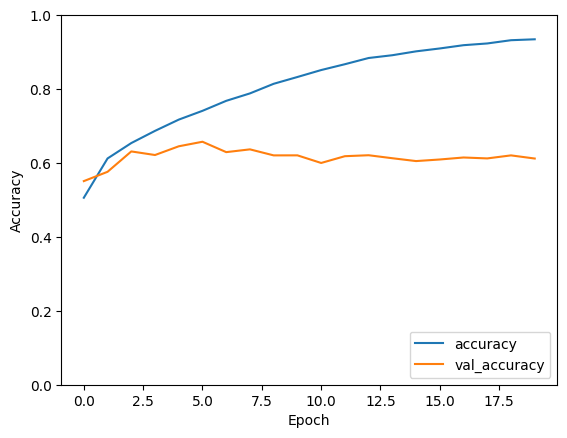

In [127]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

## Final model

---

In [128]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

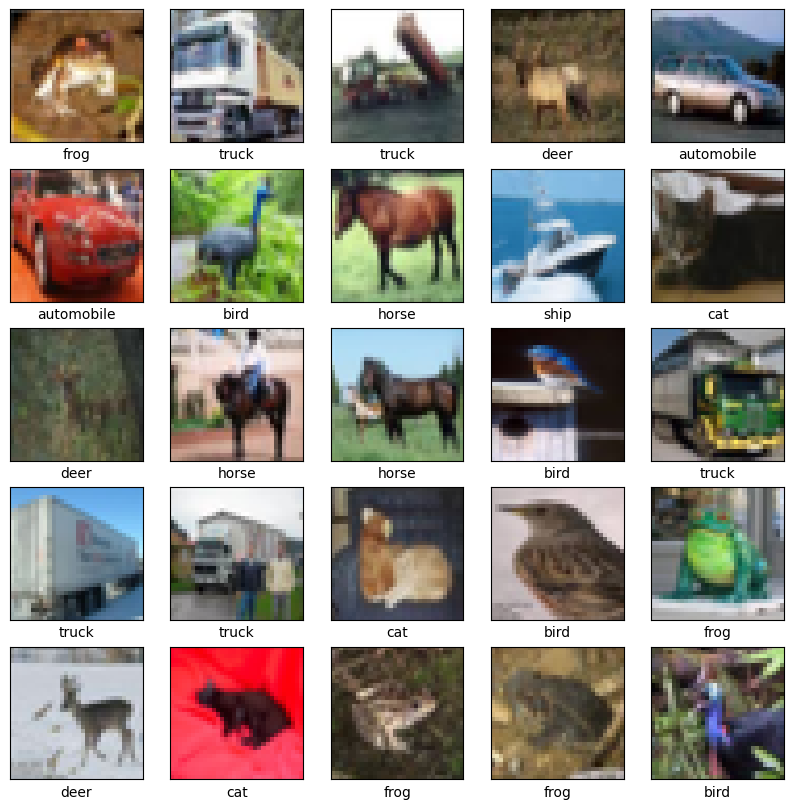

In [129]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [130]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dropout(rate=0.01))
model.add(keras.layers.BatchNormalization())

In [131]:
optimize = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimize, loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [132]:
history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 25s 15ms/step - loss: 1.9455 - accuracy: 0.5094 - val_loss: 1.4246 - val_accuracy: 0.5709
Epoch 2/20
1563/1563 [==============================] - 24s 15ms/step - loss: 1.2854 - accuracy: 0.6126 - val_loss: 1.2033 - val_accuracy: 0.6236
Epoch 3/20
1563/1563 [==============================] - 24s 15ms/step - loss: 1.0609 - accuracy: 0.6599 - val_loss: 1.2152 - val_accuracy: 0.6079
Epoch 4/20
1563/1563 [==============================] - 24s 15ms/step - loss: 0.9347 - accuracy: 0.6923 - val_loss: 1.1199 - val_accuracy: 0.6314
Epoch 5/20
1563/1563 [==============================] - 24s 15ms/step - loss: 0.8367 - accuracy: 0.7200 - val_loss: 1.0528 - val_accuracy: 0.6472
Epoch 6/20
1563/1563 [==============================] - 24s 15ms/step - loss: 0.7504 - accuracy: 0.7478 - val_loss: 1.0471 - val_accuracy: 0.6557
Epoch 7/20
1563/1563 [==============================] - 24s 15ms/step - loss: 0.6707 - accuracy: 0.7752 - val_loss: 1.0875 -

313/313 - 1s - loss: 1.5472 - accuracy: 0.6159 - 864ms/epoch - 3ms/step


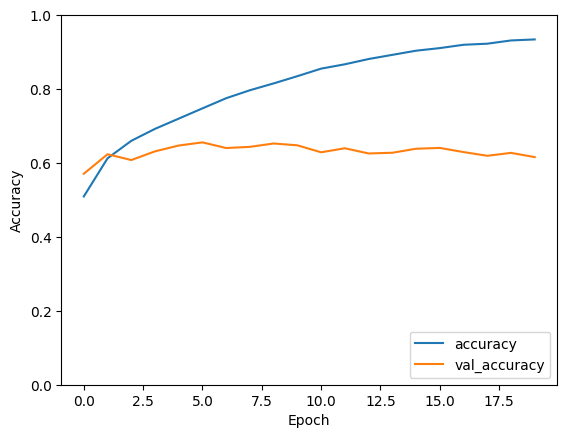

In [133]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)